# Speculation

Which district(gu) in Seoul has the most CCTV camera?

# Used modules

pandas, numpy, matplotlib, seaborn, folium

# Conclusion

* According to the visualised data, 강북구(Kangbuk-gu) and 노원구(Nowon-gu) are the area where the most CCTV Cameras are installed
* With this data, there are some of areas in black showing no data. The CSV that I collected from https://www.data.go.kr/ didn't have enough data for covering all of areas in Seoul.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# korean font settings
plt.rc("font", family="NanumGothic")
plt.rc("axes", unicode_minus=False)

# display settings

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# check the font settings
#pd.Series([-1,1,0,1]).plot(title="한글")

In [3]:
df = pd.read_csv("data/전국CCTV표준데이터.csv", encoding = "cp949")
df.shape

(50000, 15)

# check out data

In [4]:
df.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,경상남도 김해시청,NaN,경상남도 김해시 구산동 1072-19,생활방범,3,200.0,현대병원뒤,30.0,2019-11,055-330-4741,35.249247,128.871639,2019-06-26,5350000,경상남도 김해시
1,경상남도 김해시청,NaN,경상남도 김해시 구산동 305-15,생활방범,2,200.0,목화골공원,30.0,2019-12,055-330-4741,35.247411,128.873605,2019-06-26,5350000,경상남도 김해시
2,경상남도 김해시청,NaN,경상남도 김해시 삼계동 1484-14,생활방범,2,200.0,정원빌라,30.0,2019-06,055-330-4741,35.261728,128.874144,2019-06-26,5350000,경상남도 김해시
3,경상남도 김해시청,NaN,경상남도 김해시 구산동 1043,생활방범,4,200.0,최가아구찜,30.0,2019-05,055-330-4741,35.247076,128.872461,2019-06-26,5350000,경상남도 김해시
4,경상남도 김해시청,NaN,경상남도 김해시 구산동 175-10,생활방범,2,200.0,동호맨션,30.0,2019-12,055-330-4741,35.241185,128.877334,2019-06-26,5350000,경상남도 김해시


In [5]:
df["설치목적구분"].unique()

array(['생활방범', '어린이보호', '교통단속', '차량방범', '재난재해', '교통정보수집', '다목적', '시설물관리',
       '환경단속', '쓰레기단속', '도시공원 및 놀이터', '기타', '청사보안', '방범용', '학교주변 및 어린이보호',
       '도시공원/놀이터', '공원및놀이터', '방범', '방범(어린이보호구역)', '방범(공원)', '방범(경찰 설치)',
       '방범(그린파킹)', '주정차단속', '청사방호', '생활안전', '공원방범', '도로방범', '어린이보호구역',
       '방범(차번)', '교통상황관리'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
관리기관명       50000 non-null object
소재지도로명주소    28507 non-null object
소재지지번주소     44545 non-null object
설치목적구분      50000 non-null object
카메라대수       50000 non-null int64
카메라화소수      45686 non-null float64
촬영방면정보      35940 non-null object
보관일수        47736 non-null float64
설치년월        36783 non-null object
관리기관전화번호    50000 non-null object
위도          49727 non-null float64
경도          49708 non-null float64
데이터기준일자     50000 non-null object
제공기관코드      50000 non-null object
제공기관명       50000 non-null object
dtypes: float64(4), int64(1), object(10)
memory usage: 5.7+ MB


# check out missing values

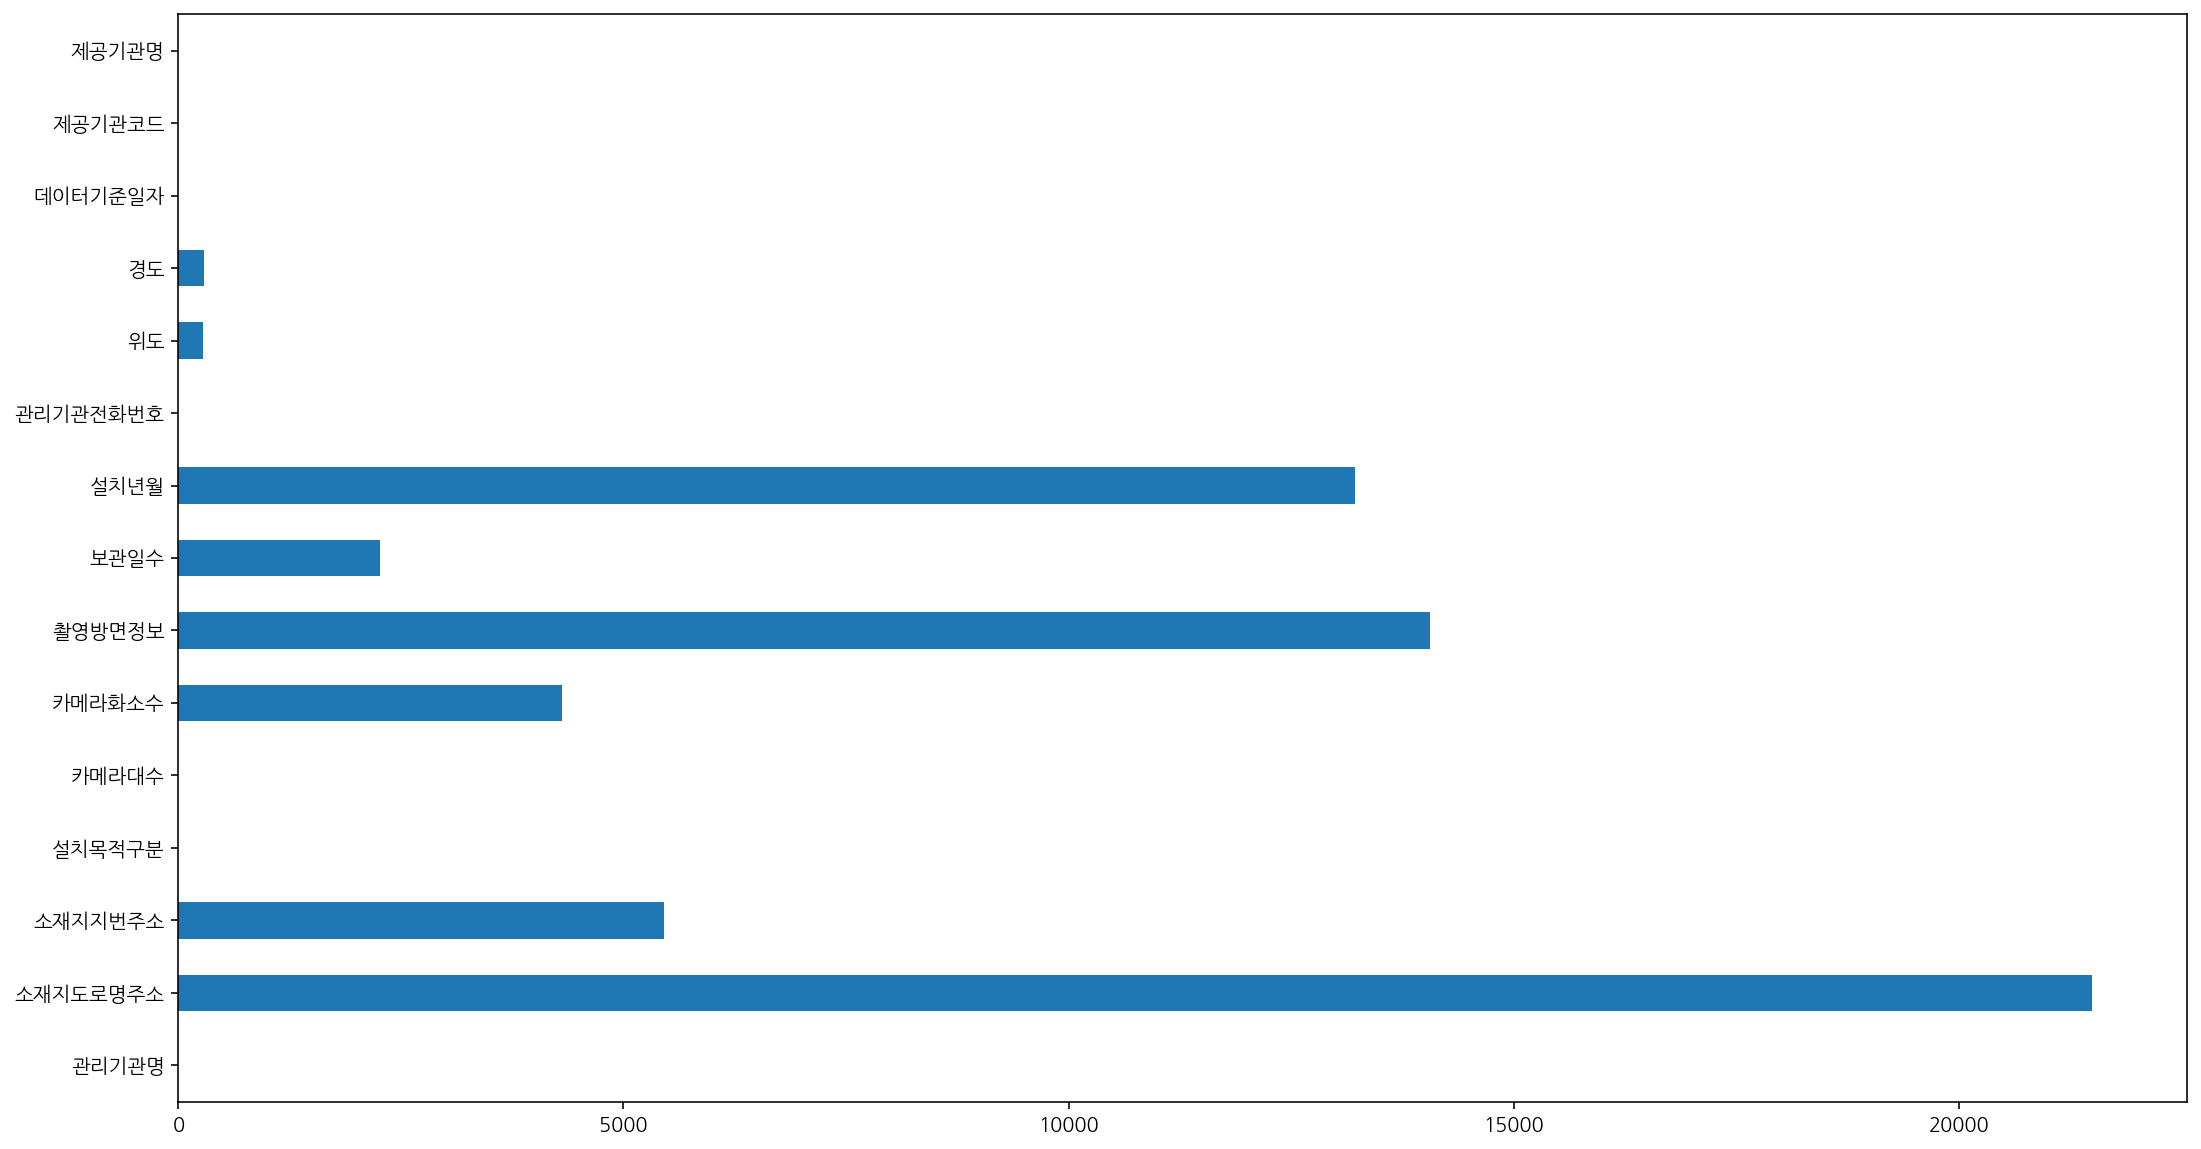

In [7]:
df.isnull().sum().plot.barh(figsize=(18,10))

In [8]:
columns = ["관리기관명","관리기관전화번호", "소재지지번주소", "설치목적구분", "카메라대수", "카메라화소수", "촬영방면정보",
           "보관일수", "설치년월" , "위도", "경도", "제공기관명"]
df_seoul = df.loc[df["소재지지번주소"].str.contains("서울", na=False), columns].copy()

In [9]:
df_seoul.shape

(6441, 12)

# data preprocessing

In [10]:
df_seoul["관리기관명"].unique()

array(['서울특별시 성북구청', '서울특별시 송파구청', '서울특별시 구로구청', '경상남도 진주시청', '서울특별시 중구청',
       '서울특별시 강북구청', '서울특별시 강동구청', '서울특별시 성동구청', '서울특별시 노원구청',
       '서울특별시 종로구청', '서울특별시 강북경찰서', '서울특별시 동대문구', '서울특별시  양천구청',
       '서울특별시 영등포구', '경기도 평택시', '인천광역시 계양구청', '경기도 구리시청', '서울특별시 금천구',
       '서울특별시 강서구', '서울특별시 광진구청', '서울특별시 강남구청'], dtype=object)

In [11]:
df_seoul.loc[~df_seoul["관리기관명"].str.contains("경기도 구리시청|경기도 평택시|인천광역시 계양구청|경상남도 진주시청"),"지역"] = 1
df_seoul.loc[df_seoul["관리기관명"].str.contains("경기도 구리시청|경기도 평택시|인천광역시 계양구청|경상남도 진주시청"),"지역"] = 0
df_seoul["지역"] = df_seoul["지역"].astype(int)

In [12]:
df_seoul = df_seoul.loc[df_seoul["지역"] == 1]

In [13]:
df_seoul["지역(구)"] = df_seoul["소재지지번주소"].str.split().map(lambda row: row[1])

In [14]:
df_seoul["지역(구)"].unique()

array(['성북구', '송파구', '구로구', '중구', '강북구', '강동구', '성동구', '노원구', '종로구',
       '동대문구', '양천구', '양천구신정4동', '710-14', '5-3', '금천구', '강서구', '광진구',
       '강남구'], dtype=object)

In [15]:
df_seoul.loc[df_seoul["지역(구)"] == "5-3", "지역(구)"] = "영등포구"
df_seoul.loc[df_seoul["지역(구)"] == "710-14", "지역(구)"] = "영등포구"
df_seoul.loc[df_seoul["지역(구)"] == "양천구신정4동", "지역(구)"] = "양천구"

In [16]:
df_seoul.loc[df_seoul["설치목적구분"].str.contains("어린이보호|차량방범|재난재해|다목적|시설물관리|도시공원 및 놀이터|기타|청사보안|방범용|\
                    학교주변 및 어린이보호|도시공원/놀이터|공원및놀이터|방범|방범(어린이보호구역)|방범(공원)|방범(경찰 설치)|\
                    방범(그린파킹)|청사방호|생활안전|공원방범|도로방범|어린이보호구역|방범(차번호)|"),"설치목적구분(필터링)"] = "생활방범"
df_seoul.loc[df_seoul["설치목적구분"].str.contains("교통정보수집|환경단속|쓰레기단속|주정차단속|교통상황관리"), "설치목적구분(필터링)"] = "단속"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df_seoul["설치목적구분(필터링)"].unique()

array(['생활방범', '단속'], dtype=object)

In [18]:
df_seoul["지역(구)"].unique()

array(['성북구', '송파구', '구로구', '중구', '강북구', '강동구', '성동구', '노원구', '종로구',
       '동대문구', '양천구', '영등포구', '금천구', '강서구', '광진구', '강남구'], dtype=object)

# Visualisation

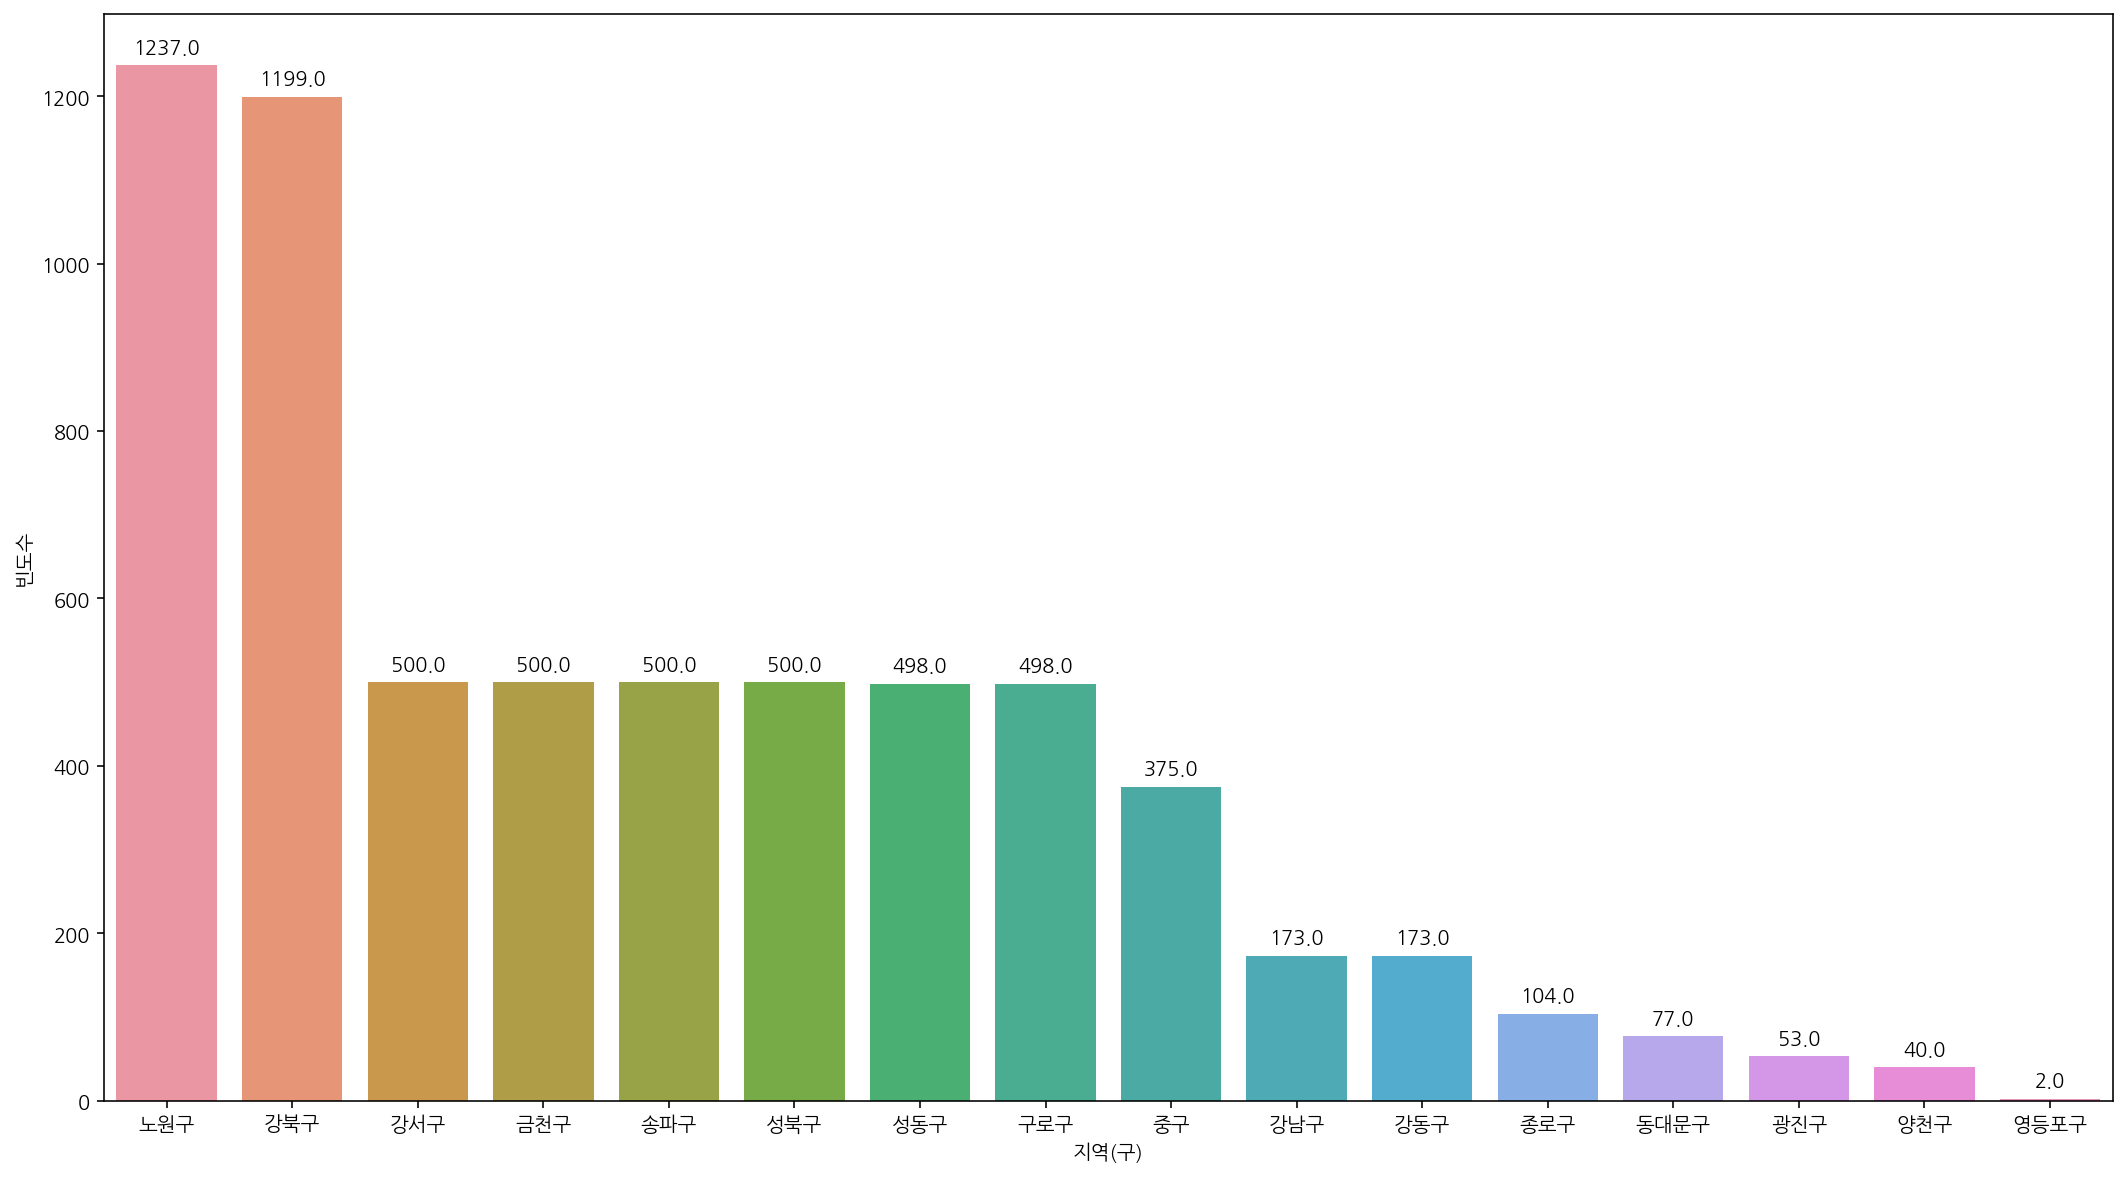

In [19]:
df_seoul_gu = df_seoul["지역(구)"].value_counts()
plt.figure(figsize=(18,10))

df_seoul_gu = df_seoul_gu.reset_index()
df_seoul_gu.columns=["지역(구)", "빈도수"]

# barplot annotation
df_barplot = sns.barplot(data = df_seoul_gu, x="지역(구)", y="빈도수")
for p in df_barplot.patches:
    df_barplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

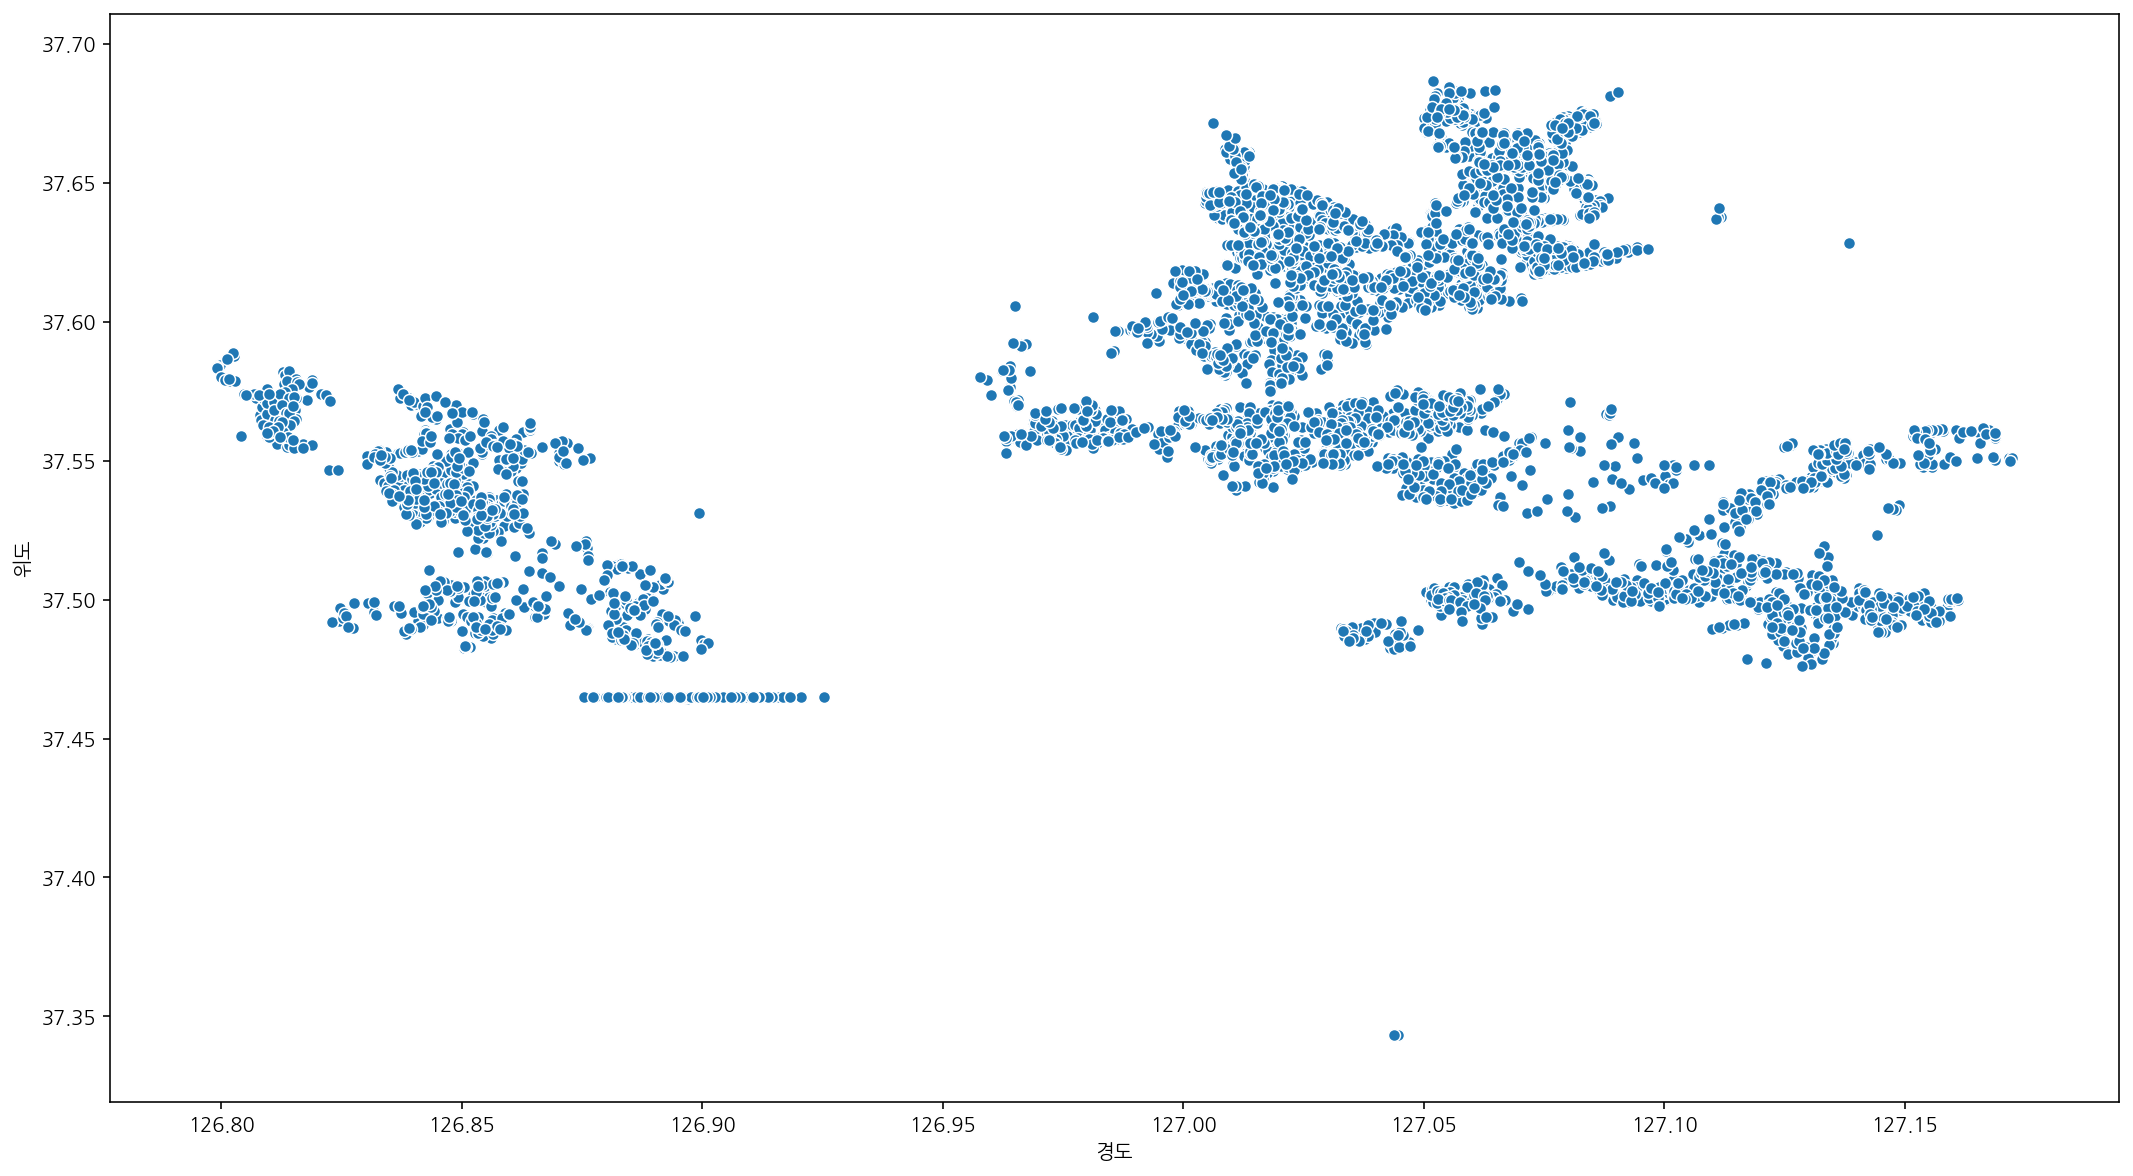

In [20]:
plt.figure(figsize=(18,10))

sns.scatterplot(data=df_seoul, x="경도", y="위도")

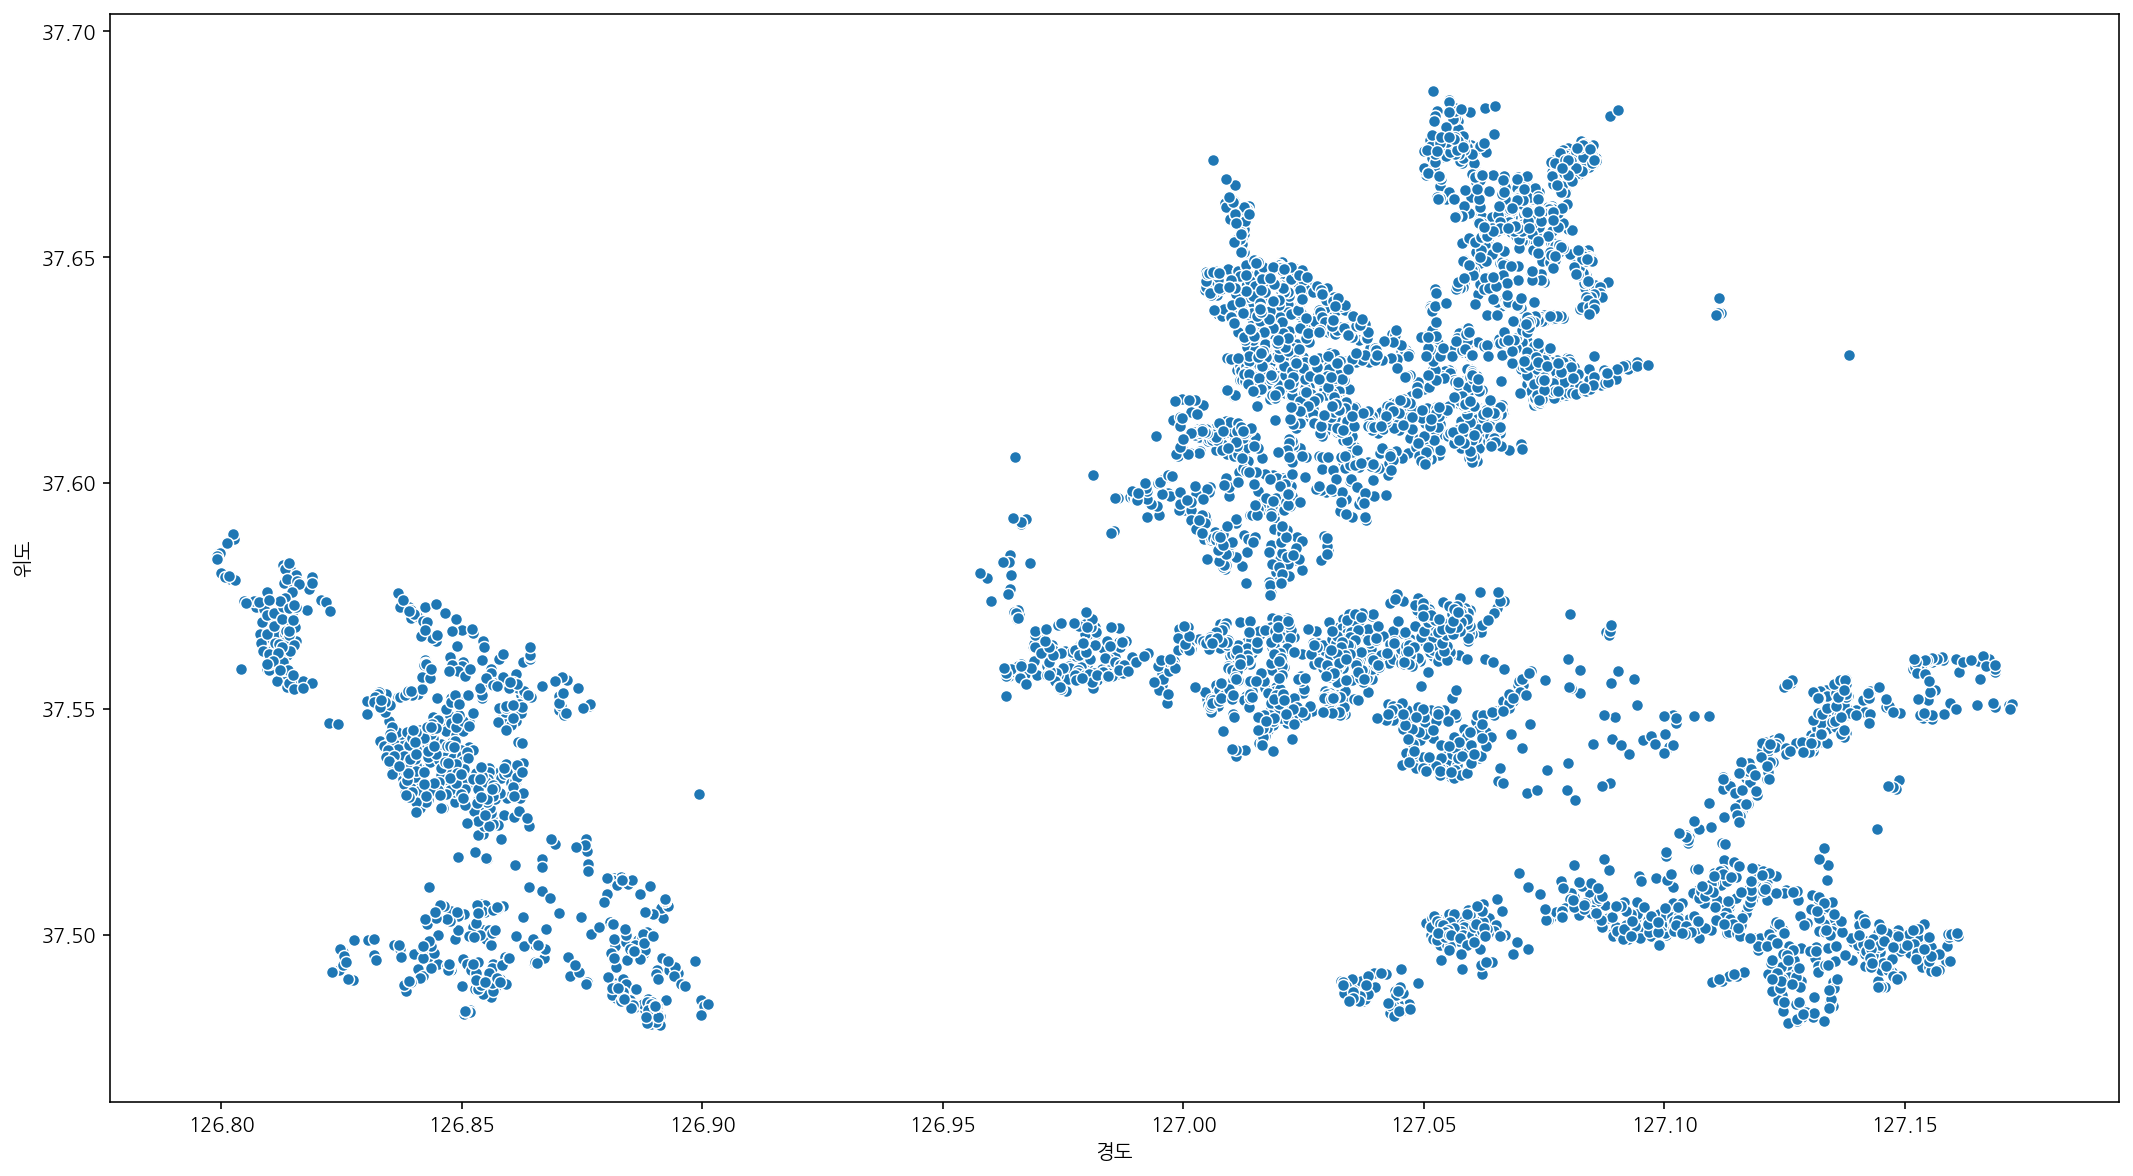

In [21]:
plt.figure(figsize=(18,10))
df_seoul2 = df_seoul.loc[(df_seoul["위도"]> 37.48) & (df_seoul["경도"]> 0) & (df_seoul["지역(구)"].notnull())]

sns.scatterplot(data=df_seoul2, x="경도", y="위도")

In [22]:
df_seoul2.head()

,관리기관명,관리기관전화번호,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,위도,경도,제공기관명,지역,지역(구),설치목적구분(필터링)
56,서울특별시 성북구청,02-2241-4562,서울특별시 성북구 장위동 76-30,생활방범,3,200.0,360도전방면,30.0,2006-12,37.616057,127.051134,서울특별시 성북구,1,성북구,생활방범
57,서울특별시 성북구청,02-2241-4562,서울특별시 성북구 장위동 238-63,생활방범,3,200.0,360도전방면,30.0,2011-12,37.614854,127.051187,서울특별시 성북구,1,성북구,생활방범
58,서울특별시 성북구청,02-2241-4562,서울특별시 성북구 장위동 246-173,생활방범,3,130.0,360도전방면,30.0,2006-12,37.609964,127.047198,서울특별시 성북구,1,성북구,생활방범
59,서울특별시 성북구청,02-2241-4562,서울특별시 성북구 장위동 6-62,생활방범,3,200.0,360도전방면,30.0,2009-12,37.614693,127.059856,서울특별시 성북구,1,성북구,생활방범
60,서울특별시 성북구청,02-2241-4562,서울특별시 성북구 정릉동 764-4,생활방범,2,200.0,360도전방면,30.0,2007-12,37.615654,127.001612,서울특별시 성북구,1,성북구,생활방범


<Figure size 1296x720 with 0 Axes>

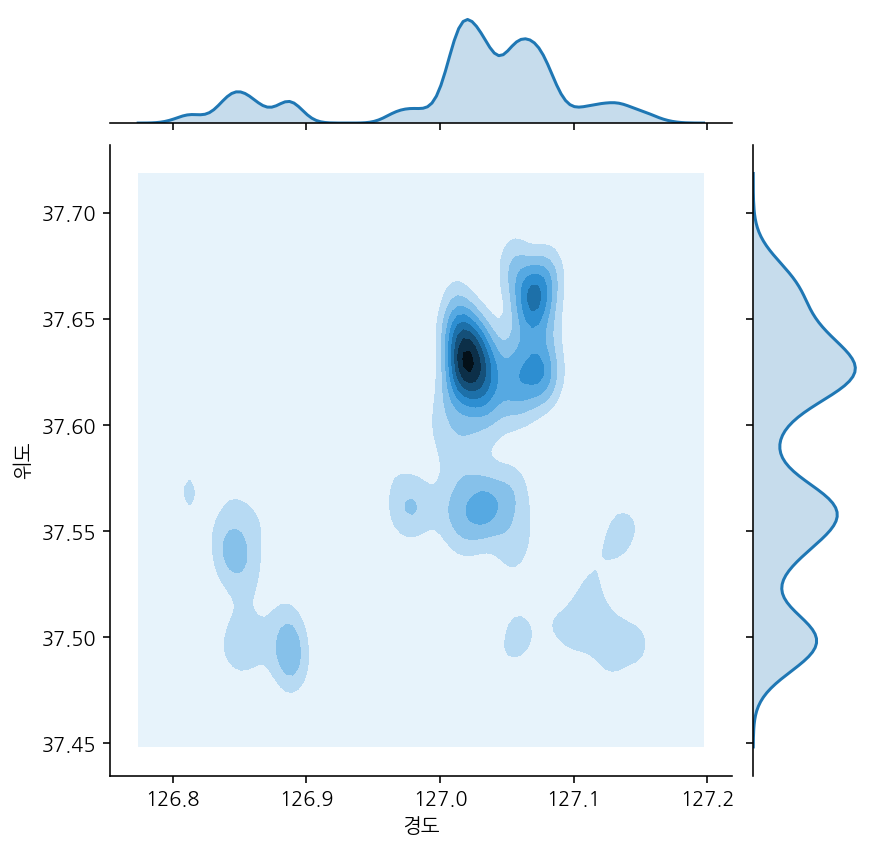

In [23]:
plt.figure(figsize=(18,10))
sns.jointplot(data=df_seoul2, x="경도", y="위도", kind="kde")

In [24]:
import folium

In [25]:
lat = df_seoul2["위도"].mean()
long = df_seoul2["경도"].mean()

In [26]:
geo_path = 'data/seoul_municipalities_geo.json'

import json

geo_json = json.load(open(geo_path, encoding="utf-8"))

In [27]:
# extract gu name from geo_json
geo_json
print(geo_json["features"][0]["properties"])
print(geo_json["features"][0]["properties"]["SIG_KOR_NM"])

{'SIG_CD': '11320', 'SIG_KOR_NM': '도봉구', 'SIG_ENG_NM': 'Dobong-gu', 'ESRI_PK': 0, 'SHAPE_AREA': 0.00211, 'SHAPE_LEN': 0.239901}
도봉구


In [28]:
df_seoul_gu_mean = df_seoul.groupby("지역(구)")["경도", "위도"].mean()
df_seoul_gu_mean = df_seoul_gu_mean.reset_index()
df_seoul_gu_mean.head()

,지역(구),경도,위도
0,강남구,127.052685,37.496103
1,강동구,127.141891,37.550246
2,강북구,127.022028,37.632537
3,강서구,126.840300,37.551026
4,광진구,127.087297,37.547123


In [29]:
df_seoul_gu.head()

,지역(구),빈도수
0,노원구,1237
1,강북구,1199
2,강서구,500
3,금천구,500
4,송파구,500


In [30]:
df_seoul3 = pd.merge(df_seoul_gu, df_seoul_gu_mean, on="지역(구)", how="inner")
df_seoul3.head()

,지역(구),빈도수,경도,위도
0,노원구,1237,127.069272,37.646908
1,강북구,1199,127.022028,37.632537
2,강서구,500,126.840300,37.551026
3,금천구,500,126.902319,37.465058
4,송파구,500,127.118249,37.504340


In [31]:


m = folium.Map(location=[lat, long], zoomstart=12, tiles="Stamen Toner")

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_seoul3,
    columns=['지역(구)', '빈도수'],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of CCTV'
).add_to(m)


for i in df_seoul3.index:
    sub_lat= df_seoul3.loc[i,"위도"]
    sub_long= df_seoul3.loc[i,"경도"]

    # draw circles based on the category of installation purpose

        
    gu = df_seoul3.loc[i, "지역(구)"]
        
    radius = np.sqrt(df_seoul3.loc[i, "빈도수"])
    num = df_seoul3.loc[i, "빈도수"]
    
    tooltip = f"{gu} - {num}"
        
    color="#a20a0a"


    folium.CircleMarker([sub_lat, sub_long],
                        radius=radius,
                        tooltip=tooltip,
                        color=color,
                        fill=True,
                        fill_opacity=0.80
                       ).add_to(m)


m.save("folium_result.html")
m



folium map result is shown in **folium_result.html**